<a href="https://colab.research.google.com/github/18708064/postblock1-774/blob/main/PostBlock1_Big_Data_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Streaming and Big Data Processing Answers**

1.  Batch updates with high latency.

2. FIFO queue

3. - CREATE STREAM WITH
   - CREATE TABLE AS SELECT

4.  0.83 MB/second

5.  Peer to peer, scales horizontally and with topics partitioned across brokers.

6.
- **Scaling Horizontally:** Kafka scales horizontally by adding more brokers to the cluster. Topics can be partitioned across these brokers, which allows for parallel processing and handling larger volumes of data.
- **Fault Tolerance:** Kafka achieves fault tolerance through replication. Each partition can have multiple replicas stored on different brokers. If one broker fails, a replica on another broker can take over as the leader.
- **Impact of a Single Partition:** With only a single partition, Kafka's scalability is limited since parallel processing across partitions isn't possible. Additionally, fault tolerance is constrained since there are no replicas within that partition to distribute the load or handle failures.



**Question 2: Kafka ATM Fraud**

2.1.The command specifies that the data will be read from a Kafka topic named atm_txns, and the data format is JSON. This setup allows KSQL to process and analyze ATM transactions in real time.

2.2.

**Comparison of Transactions**:Fraud detection often involves comparing a new transaction with past transactions for the same account. For instance, detecting multiple transactions within a short period or at distant locations requires access to historical transaction data.

**Correlation and Context:** By joining streams, you can correlate incoming transactions with previous ones to identify patterns or anomalies indicative of fraudulent behavior. In the ATM fraud detection example, a stream-stream join is used to compare transactions from the same account to check for suspicious activity based on time, location, and transaction frequency

**Question 3: Stream Processing**

 1.**Source Property**: The source must support replayability. This means that it should allow the system to re-read data (e.g., using Kafka’s partitioning and offset management). Replayability ensures exactly-once processing by allowing the system to recover from failures and process messages in the correct order.

**Sink property**: The sink must be idempotent, meaning that applying the same operation multiple times results in the same outcome as applying it once. For example, if writing to a distributed filesystem like HDFS, it should support operations like overwrite or deduplication to ensure that duplicate results are not stored, thus preserving exactly-once semantics.

2. **Google PubSub lacks "exactly-once" delivery semantics.**

When considering the integration of Google PubSub with Spark Structured Streaming, it's important to note that PubSub lacks "exactly-once" delivery semantics. This means that while PubSub guarantees at least one delivery of each message, it does not ensure that each message is processed exactly once.

For our streaming applications, "exactly-once" semantics are crucial to prevent data duplication and ensure consistent results.

3.1
```
import apache_beam as beam
from apache_beam.io.kafka import ReadFromKafka

stream_live = (pipeline
               | "Read from Kafka" >> ReadFromKafka(
                     consumer_config={'bootstrap.servers': 'localhost:9092'},
                     topics=['your_topic_name']
                 ))

```



3.2
- **Library:** joblib or pickle
- **What to serialize:** The trained LogisticRegression model (model in this case).

3.3.

**Change**: The Beam runner configuration

3.4. Sliding windows

3.5. Dockerize a FastAPI application with multiple workers to consume from the Kafka topic, and deploy it to Kubernetes.

**References:**

1.  Pyke, K. (2024) 'Kafka Partitions: Essential Concepts for Scalability and Performance'. DataCamp, 3 June. Available at: https://www.datacamp.com/tutorial/kafka-partitions (Accessed:26 September 2024)

2. Salinger, N. (n.d.) 'Optimizing Kafka Performance'. Intel Granulate. Available at: https://granulate.io/blog/optimizing-kafka-performance/ (Accessed: 26 September 2024).

3. Glover, R. (2018) 'ATM Fraud Detection with Apache Kafka and KSQL'. Confluent. Available at: https://www.confluent.io/blog/atm-fraud-detection-apache-kafka-ksql/ (Accessed:26 September 2024).


4. Kreps, J. (2017) 'Exactly-Once Semantics Are Possible: Here’s How Kafka Does It'. Confluent. Available at: https://www.confluent.io/blog/exactly-once-semantics-are-possible-heres-how-apache-kafka-does-it/ (Accessed: [27 September 2024).

5. Microsoft (2024) 'Create Apache Spark Streaming jobs with exactly-once event processing'. Microsoft Learn. Available at: https://learn.microsoft.com/en-us/azure/hdinsight/spark/apache-spark-streaming-exactly-once
(Accessed:27 September 2024).

6. thewizard (2023) 'High Throughput ‘Exactly Once’ Streaming from Google Pub/Sub with Structured Streaming on Databricks'. Databricks Community Technical Blog. Available at: https://community.databricks.com/t5/technical-blog/high-throughput-exactly-once-streaming-from-google-pub-sub-with/ba-p/52616 (Accessed: 27 September 2024).

**Part 2: Streaming Applications**

Installing and importing the Beam

In [ ]:
!pip install apache-beam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 16.1 MB/s eta 0:00:00
 

Importing  Libraries

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions
import pandas as pd

Accessing Files from Github

In [ ]:
import pandas as pd

# URLs to the raw CSV files on GitHub
orders_url = 'https://raw.githubusercontent.com/18708064/postblock1-774/main/orders.csv'
users_url = 'https://raw.githubusercontent.com/18708064/postblock1-774/main/users.csv'

# Download the files using wget
!wget -O users.csv {users_url}
!wget -O orders.csv {orders_url}

--2024-10-02 04:50:22--  https://raw.githubusercontent.com/18708064/postblock1-774/main/users.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143675 (140K) [text/plain]
Saving to: ‘users.csv’

users.csv           100%[===================>] 140.31K  --.-KB/s    in 0.08s   

2024-10-02 04:50:23 (1.65 MB/s) - ‘users.csv’ saved [143675/143675]

--2024-10-02 04:50:23--  https://raw.githubusercontent.com/18708064/postblock1-774/main/orders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73312907 (70M) [text/plain]
Saving to: ‘or

Inspect the Data

In [ ]:
# Read the CSV files into DataFrames
users_df = pd.read_csv('users.csv', delimiter=',')
orders_df = pd.read_csv('orders.csv', delimiter=';')

print("Users DataFrame:")
print(users_df.head())

print("\nOrders DataFrame:")
print(orders_df.head())

Users DataFrame:
   user_id             name  gender  age                     address  \
0        1     Anthony Wolf    male   73    New Rachelburgh-VA-49583   
1        2  James Armstrong    male   56  North Jillianfort-UT-86454   
2        3        Cody Shaw    male   75         North Anne-SC-53799   
3        4  Sierra Hamilton  female   76     New Angelafurt-ME-46190   
4        5      Chase Davis    male   31    South Bethmouth-WI-18562   

  date_joined  
0  2019/03/13  
1  2020/11/06  
2  2004/05/29  
3  2005/08/26  
4  2018/04/30  

Orders DataFrame:
   order_no  user_id             product_list date_purchased
0      1000     1887                  Cassava     2000-01-01
1      1001      838  Calabash, Water Spinach     2000-01-01
2      1002     2032            Onion, Rapini     2000-01-01
3      1003     1482   Swiss Chard, Artichoke     2000-01-01
4      1004      475  Turnip Greens, Plantain     2000-01-01


Defining Parsing Functions

In [ ]:
def parse_users(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=',')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 6:
        return None

    user_id, name, gender, age, address, date_joined = fields
    user_info = {
        'name': name,
        'gender': gender,
        'age': int(age),
        'address': address,
        'date_joined': date_joined
    }
    return (int(user_id), user_info)




Orders Function

In [ ]:
def parse_orders(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=';')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 4:
        return None

    order_no, user_id, product_list, date_purchased = fields
    order_info = {
        'order_no': order_no,
        'product_list': product_list,
        'date_purchased': date_purchased
    }
    return (int(user_id), order_info)



Create the Beam Pipline

In [ ]:
options = PipelineOptions()
with beam.Pipeline(options=options) as p:
    # Read and parse the users data
    users = (
        p
        | 'ReadUsers' >> beam.io.ReadFromText('users.csv', skip_header_lines=1)
        | 'ParseUsers' >> beam.Map(parse_users)
        | 'FilterValidUsers' >> beam.Filter(lambda x: x is not None)
    )

    # Read and parse the orders data
    orders = (
        p
        | 'ReadOrders' >> beam.io.ReadFromText('orders.csv', skip_header_lines=1)
        | 'ParseOrders' >> beam.Map(parse_orders)
        | 'FilterValidOrders' >> beam.Filter(lambda x: x is not None)
    )

    # Join the input files as streams using CoGroupByKey
    joined_data = ({'users': users, 'orders': orders}
                   | 'GroupByUserID' >> beam.CoGroupByKey())

    # Format the result for output
    def format_result(element):
        user_id, grouped_data = element
        users_info = grouped_data['users']
        orders_info = grouped_data['orders']

        user_info = users_info[0] if users_info else {}
        return {
            'user_id': user_id,
            'user_info': user_info,
            'orders': orders_info
        }

    # Collect the output
    output = (
        joined_data
        | 'FormatResult' >> beam.Map(format_result)
        | 'WriteOutput' >> beam.io.WriteToText('joined_output.txt')
    )




Read and display

In [ ]:
# Read and display only the first 5 lines of the joined data
print("\nJoined Data (First 5 Lines):")
with open('joined_output.txt-00000-of-00001') as f:
    for i, line in enumerate(f):
        if i >= 5:  # Stop after 5 lines
            break
        print(line.strip())


Joined Data (First 5 Lines):
{'user_id': 1887, 'user_info': {'name': 'Andrea Hartman', 'gender': 'female', 'age': 58, 'address': 'Karenmouth-MN-95314', 'date_joined': '2016/07/06'}, 'orders': [{'order_no': '1000', 'product_list': 'Cassava', 'date_purchased': '2000-01-01'}, {'order_no': '1356', 'product_list': 'Bitter Melon, Turnip, Water Chestnut', 'date_purchased': '2000-01-04'}, {'order_no': '2151', 'product_list': 'English Cucumber, Plantain, Taro', 'date_purchased': '2000-01-09'}, {'order_no': '3075', 'product_list': 'Bell Pepper, Shallots', 'date_purchased': '2000-01-13'}, {'order_no': '5406', 'product_list': 'Watercress, Hearts of Palm', 'date_purchased': '2000-01-24'}, {'order_no': '7815', 'product_list': 'Swiss Chard, Fiddlehead, Fennel', 'date_purchased': '2000-02-09'}, {'order_no': '11147', 'product_list': 'Tomato, Mustard Greens, Lotus Seed, Grape Leaves', 'date_purchased': '2000-02-22'}, {'order_no': '15456', 'product_list': 'Fennel', 'date_purchased': '2000-03-14'}, {'ord

Calculate Average Orders by Gender

In [ ]:
def run_pipeline():
    options = PipelineOptions()
    with beam.Pipeline(options=options) as p:
        # Read and parse the users data
        users = (
            p
            | 'ReadUsers' >> beam.io.ReadFromText('users.csv', skip_header_lines=1)
            | 'ParseUsers' >> beam.Map(parse_users)
            | 'FilterValidUsers' >> beam.Filter(lambda x: x is not None)
        )

        # Read and parse the orders data
        orders = (
            p
            | 'ReadOrders' >> beam.io.ReadFromText('orders.csv', skip_header_lines=1)
            | 'ParseOrders' >> beam.Map(parse_orders)
            | 'FilterValidOrders' >> beam.Filter(lambda x: x is not None)
        )

        # Join the input files as streams using CoGroupByKey
        joined_data = (
            {'users': users, 'orders': orders}
            | 'GroupByUserID' >> beam.CoGroupByKey()
        )

        # Calculate total orders per gender and user count
        def calculate_order_counts(element):
            user_id, grouped_data = element
            orders_info = grouped_data['orders']
            num_orders = len(orders_info)
            return (grouped_data['users'][0]['gender'], (num_orders, 1))  # Return both order count and user count

        gender_order_counts = (
            joined_data
            | 'CalculateOrderCounts' >> beam.Map(calculate_order_counts)
            | 'GroupByGender' >> beam.CombinePerKey(lambda counts: (sum(c[0] for c in counts), sum(c[1] for c in counts)))
        )

        # Calculate average orders per gender
        gender_order_counts_avg = (
            gender_order_counts
            | 'CalculateAverageOrders' >> beam.Map(lambda x: (x[0], x[1][0] / x[1][1]))  # Divide total orders by user count
        )

        # Output results
        def format_result(element):
            gender, avg_orders = element
            return f'Gender: {gender}, Average Orders: {avg_orders}'

        # Print results to verify
        gender_order_counts_avg | 'PrintResults' >> beam.Map(print)

        # Write the results to a text file
        gender_order_counts_avg | 'FormatResults' >> beam.Map(format_result) | 'WriteOutput' >> beam.io.WriteToText('average_orders_by_gender.txt')

# Execute the pipeline
run_pipeline()


('male', 678.2220381110191)
('female', 678.5173913043478)


Verify the Result Using Pandas

In [ ]:
import pandas as pd

# Load the data
users_df = pd.read_csv('users.csv', delimiter=',')
orders_df = pd.read_csv('orders.csv', delimiter=';')  # Note the semi-colon delimiter

# Merge the DataFrames on 'user_id'
merged_df = pd.merge(users_df, orders_df, on='user_id')

# Group by 'gender' and calculate the total number of orders
order_counts_by_gender = merged_df.groupby('gender').size().reset_index(name='order_count')

# Calculate the number of unique users for each gender
user_counts_by_gender = users_df['gender'].value_counts().reset_index()
user_counts_by_gender.columns = ['gender', 'user_count']

# Merge the order counts and user counts
average_orders_by_gender_pandas = pd.merge(order_counts_by_gender, user_counts_by_gender, on='gender')

# Calculate the average orders
average_orders_by_gender_pandas['average_orders'] = average_orders_by_gender_pandas['order_count'] / average_orders_by_gender_pandas['user_count']

# Output the result
print(average_orders_by_gender_pandas)






   gender  order_count  user_count  average_orders
0  female       780295        1150      678.517391
1    male       818614        1207      678.222038


Determine the total number of orders placed by male and female customers in specific age groups.


In [ ]:
def run_pipeline():
    options = PipelineOptions()
    with beam.Pipeline(options=options) as p:
        # Read and parse the users data
        users = (
            p
            | 'ReadUsers' >> beam.io.ReadFromText('users.csv', skip_header_lines=1)
            | 'ParseUsers' >> beam.Map(parse_users)
            | 'FilterValidUsers' >> beam.Filter(lambda x: x is not None)
        )

        # Read and parse the orders data
        orders = (
            p
            | 'ReadOrders' >> beam.io.ReadFromText('orders.csv', skip_header_lines=1)
            | 'ParseOrders' >> beam.Map(parse_orders)
            | 'FilterValidOrders' >> beam.Filter(lambda x: x is not None)
        )

        # Join the input files as streams using CoGroupByKey
        joined_data = (
            {'users': users, 'orders': orders}
            | 'GroupByUserID' >> beam.CoGroupByKey()
        )

        # Calculate total orders per gender and user count
        def calculate_order_counts(element):
            user_id, grouped_data = element
            orders_info = grouped_data['orders']
            num_orders = len(orders_info)
            return (grouped_data['users'][0]['gender'], (num_orders, 1))  # Return both order count and user count

        gender_order_counts = (
            joined_data
            | 'CalculateOrderCounts' >> beam.Map(calculate_order_counts)
            | 'GroupByGender' >> beam.CombinePerKey(lambda counts: (sum(c[0] for c in counts), sum(c[1] for c in counts)))
        )

        # Calculate average orders per gender
        gender_order_counts_avg = (
            gender_order_counts
            | 'CalculateAverageOrders' >> beam.Map(lambda x: (x[0], x[1][0] / x[1][1]))  # Divide total orders by user count
        )

        # Branch 1: Output total number of orders
        total_orders = (
            gender_order_counts
            | 'CalculateTotalOrders' >> beam.Map(lambda x: ('Total Orders', sum([x[1][0]])))
        )

        # Output total number of orders
        def format_total_orders(element):
            key, total = element
            return f'{key}: {total}'

        total_orders | 'FormatTotalOrders' >> beam.Map(format_total_orders) | 'WriteTotalOrders' >> beam.io.WriteToText('total_orders.txt')

        # Branch 2: Output average orders by gender
        def format_average_orders(element):
            gender, avg_orders = element
            return f'Gender: {gender}, Average Orders: {avg_orders}'

        gender_order_counts_avg | 'FormatAverageOrders' >> beam.Map(format_average_orders) | 'WriteAverageOrders' >> beam.io.WriteToText('average_orders_by_gender.txt')

        # Print results to verify
        total_orders | 'PrintTotalOrders' >> beam.Map(print)
        gender_order_counts_avg | 'PrintAverageOrders' >> beam.Map(print)

# Execute the pipeline
run_pipeline()


('male', 678.2220381110191)
('Total Orders', 818614)
('female', 678.5173913043478)
('Total Orders', 780295)


Visulization

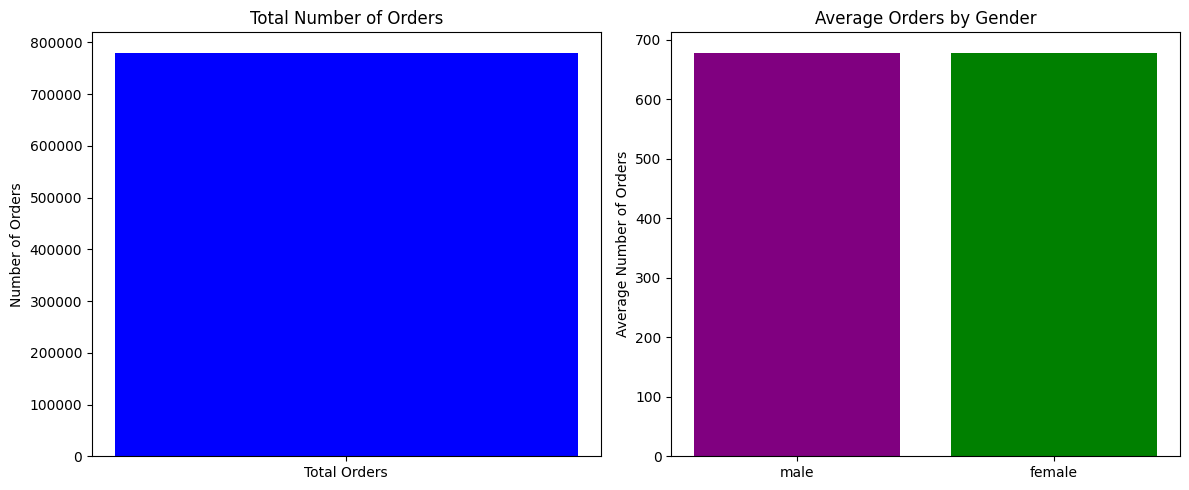

In [ ]:
import matplotlib.pyplot as plt

# Read the total orders file
with open('total_orders.txt-00000-of-00001', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()
    # Extract the total orders from the second line
    total_orders_data = lines[1].strip().split(': ')[1]
    total_orders = int(total_orders_data)

# Read the average orders by gender file
average_orders = {}
with open('average_orders_by_gender.txt-00000-of-00001', 'r') as file:
    for line in file:
        parts = line.strip().split(', ')
        gender = parts[0].split(': ')[1]
        avg_order = float(parts[1].split(': ')[1])
        average_orders[gender] = avg_order

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for total orders
ax[0].bar(['Total Orders'], [total_orders], color='blue')
ax[0].set_title('Total Number of Orders')
ax[0].set_ylabel('Number of Orders')

# Bar chart for average orders by gender
ax[1].bar(average_orders.keys(), average_orders.values(), color=['purple', 'green'])
ax[1].set_title('Average Orders by Gender')
ax[1].set_ylabel('Average Number of Orders')

# Display the plot
plt.tight_layout()
plt.show()

Question 6


 Total number of orders placed by male and female customers in the age groups [18-27),[28-37), [37-46), [46-55)

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

# Provided parse_users function
def parse_users(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=',')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 6:
        print(f"Skipping line due to unexpected number of fields: {line}")
        return None

    try:
        user_id = int(fields[0])  # User ID
        name = fields[1]          # Name
        gender = fields[2]        # Gender
        age = int(fields[3])      # Age (corrected column index)
        address = fields[4]       # Address
        date_joined = fields[5]   # Date joined

        user_info = {
            'name': name,
            'gender': gender,
            'age': age,
            'address': address,
            'date_joined': date_joined
        }
        return (user_id, user_info)
    except ValueError as e:
        print(f"Skipping line due to parsing error: {line}. Error: {e}")
        return None

# Provided parse_orders function
def parse_orders(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=';')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 4:
        print(f"Skipping line due to unexpected number of fields: {line}")
        return None

    try:
        order_no = int(fields[0])       # Order number
        user_id = int(fields[1])        # User ID
        product_list = fields[2]        # Product list
        date_purchased = fields[3]      # Date purchased

        order_info = {
            'order_no': order_no,
            'product_list': product_list,
            'date_purchased': date_purchased
        }
        return (user_id, order_info)
    except ValueError as e:
        print(f"Skipping line due to parsing error: {line}. Error: {e}")
        return None

# Function to categorize users into age groups
def categorize_age_groups(element):
    user_id, grouped_data = element
    user_info = grouped_data['users'][0] if grouped_data['users'] else None
    orders_info = grouped_data['orders']

    if user_info:
        age = user_info['age']
        gender = user_info['gender']

        # Determine the age group
        if 18 <= age < 27:
            age_group = '[18-27)'
        elif 28 <= age < 37:
            age_group = '[28-37)'
        elif 37 <= age < 46:
            age_group = '[37-46)'
        elif 46 <= age < 55:
            age_group = '[46-55)'
        else:
            return None  # Skip users not in the specified age ranges

        return (f'{gender}_{age_group}', len(orders_info))  # Return key as 'gender_age_group'
    return None

# Format the output for writing to text file
def format_age_group_output(element):
    age_group, total_orders = element
    return f'Group: {age_group}, Total Orders: {total_orders}'

# Apache Beam pipeline
def run_pipeline():
    options = PipelineOptions()
    with beam.Pipeline(options=options) as p:
        # Read and parse the users data
        users = (
            p
            | 'ReadUsers' >> beam.io.ReadFromText('users.csv', skip_header_lines=1)
            | 'ParseUsers' >> beam.Map(parse_users)
            | 'FilterValidUsers' >> beam.Filter(lambda x: x is not None)
        )

        # Read and parse the orders data
        orders = (
            p
            | 'ReadOrders' >> beam.io.ReadFromText('orders.csv', skip_header_lines=1)
            | 'ParseOrders' >> beam.Map(parse_orders)
            | 'FilterValidOrders' >> beam.Filter(lambda x: x is not None)
        )

        # Join the input files as streams using CoGroupByKey
        joined_data = (
            {'users': users, 'orders': orders}
            | 'GroupByUserID' >> beam.CoGroupByKey()
        )

        # Calculate total orders by gender and age group
        orders_by_age_group = (
            joined_data
            | 'CategorizeByAgeGroups' >> beam.Map(categorize_age_groups)
            | 'FilterValidGroups' >> beam.Filter(lambda x: x is not None)
            | 'GroupByAgeAndGender' >> beam.CombinePerKey(sum)  # Combine counts of orders for each group
        )

        # Write the results to a text file
        orders_by_age_group | 'FormatAgeGroupOutput' >> beam.Map(format_age_group_output) | 'WriteAgeGroupOutput' >> beam.io.WriteToText('orders_by_age_group.txt')

        # Print results to verify
        orders_by_age_group | 'PrintAgeGroupResults' >> beam.Map(print)

# Execute the pipeline
run_pipeline()



('male_[28-37)', 115017)
('female_[18-27)', 94228)
('female_[37-46)', 127354)
('female_[28-37)', 120087)
('male_[37-46)', 113716)
('male_[18-27)', 121653)
('male_[46-55)', 111654)
('female_[46-55)', 97778)


To modify the pipeline to display the total number of "yams" purchased across genders within the age groups [18-27) and [28-37)

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions

# Provided parse_users function
def parse_users(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=',')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 6:
        print(f"Skipping line due to unexpected number of fields: {line}")
        return None

    try:
        user_id = int(fields[0])  # User ID
        name = fields[1]          # Name
        gender = fields[2]        # Gender
        age = int(fields[3])      # Age (corrected column index)
        address = fields[4]       # Address
        date_joined = fields[5]   # Date joined

        user_info = {
            'name': name,
            'gender': gender,
            'age': age,
            'address': address,
            'date_joined': date_joined
        }
        return (user_id, user_info)
    except ValueError as e:
        print(f"Skipping line due to parsing error: {line}. Error: {e}")
        return None

# Provided parse_orders function
def parse_orders(line):
    import csv
    from io import StringIO

    # Read the line as CSV
    reader = csv.reader(StringIO(line), delimiter=';')
    fields = next(reader)

    # Check if the line has the expected number of fields
    if len(fields) != 4:
        print(f"Skipping line due to unexpected number of fields: {line}")
        return None

    try:
        order_no = int(fields[0])       # Order number
        user_id = int(fields[1])        # User ID
        product_list = fields[2]        # Product list
        date_purchased = fields[3]      # Date purchased

        order_info = {
            'order_no': order_no,
            'product_list': product_list,
            'date_purchased': date_purchased
        }
        return (user_id, order_info)
    except ValueError as e:
        print(f"Skipping line due to parsing error: {line}. Error: {e}")
        return None

# Function to filter for age groups and yams
def categorize_yam_purchases(element):
    user_id, grouped_data = element
    user_info = grouped_data['users'][0] if grouped_data['users'] else None
    orders_info = grouped_data['orders']

    if user_info:
        age = user_info['age']
        gender = user_info['gender']

        # Determine if the user is in the specified age groups
        if (18 <= age < 27) or (28 <= age < 37):
            age_group = '[18-27)' if 18 <= age < 27 else '[28-37)'

            # Count the number of "yams" in orders
            yam_count = sum('yams' in order['product_list'].lower() for order in orders_info)

            # Return the gender, age group, and yam count
            return (f'{gender}_{age_group}', yam_count)

    return None

# Format the output for writing to text file
def format_yam_output(element):
    age_group, total_yams = element
    return f'{age_group}: Total Yams Purchased = {total_yams}'

# Apache Beam pipeline
def run_pipeline():
    options = PipelineOptions()
    with beam.Pipeline(options=options) as p:
        # Read and parse the users data
        users = (
            p
            | 'ReadUsers' >> beam.io.ReadFromText('users.csv', skip_header_lines=1)
            | 'ParseUsers' >> beam.Map(parse_users)
            | 'FilterValidUsers' >> beam.Filter(lambda x: x is not None)
        )

        # Read and parse the orders data
        orders = (
            p
            | 'ReadOrders' >> beam.io.ReadFromText('orders.csv', skip_header_lines=1)
            | 'ParseOrders' >> beam.Map(parse_orders)
            | 'FilterValidOrders' >> beam.Filter(lambda x: x is not None)
        )

        # Join the input files as streams using CoGroupByKey
        joined_data = (
            {'users': users, 'orders': orders}
            | 'GroupByUserID' >> beam.CoGroupByKey()
        )

        # Calculate total yams purchased by gender and age group
        yams_by_age_group = (
            joined_data
            | 'CategorizeYamPurchases' >> beam.Map(categorize_yam_purchases)
            | 'FilterValidYamGroups' >> beam.Filter(lambda x: x is not None)
            | 'GroupByAgeAndGender' >> beam.CombinePerKey(sum)  # Combine counts of yams for each group
        )

        # Write the results to a text file
        yams_by_age_group | 'FormatYamOutput' >> beam.Map(format_yam_output) | 'WriteYamOutput' >> beam.io.WriteToText('yams_by_age_group.txt')

        # Print results in a clean format to verify
        yams_by_age_group | 'PrintYamResults' >> beam.Map(lambda x: print(f'{x[0]}: Total Yams Purchased = {x[1]}'))

# Execute the pipeline
run_pipeline()


female_[28-37): Total Yams Purchased = 2685
male_[18-27): Total Yams Purchased = 2628
male_[28-37): Total Yams Purchased = 2467
female_[18-27): Total Yams Purchased = 1986
